<a href="https://colab.research.google.com/github/Bertha-ding/independent-study/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats

In [190]:
def f_1(x):
  return x**2
def f_2(x,y):
  return x**2+y**2
def f_3(x,y):
  return (1-x)**2+100*(y-x**2)**2
def f_4(x):
  return x**2-x+2
def f_5(x):
  return (x**2)/2-2*x+1

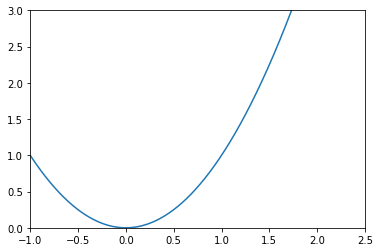

In [191]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_1(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

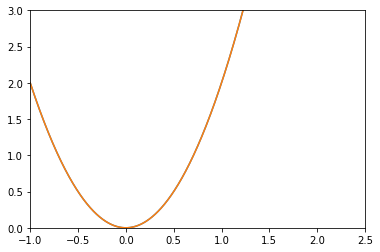

In [192]:
x = np.linspace(-1,2.5,1000)
y = np.linspace(-1,2.5,1000)
plt.plot(x,f_2(x,y))
plt.plot(y,f_2(x,y))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

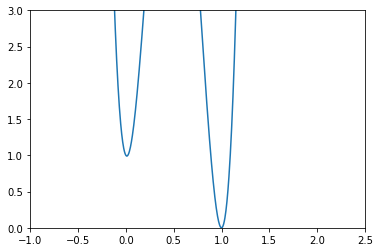

In [193]:
x = np.linspace(-1,2.5,1000)
y = np.linspace(-1,2.5,1000)
plt.plot(x,f_3(x,y))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

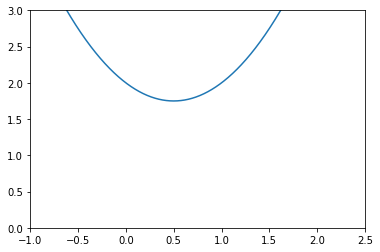

In [194]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_4(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

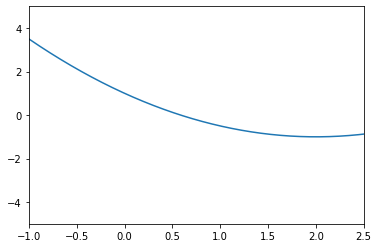

In [195]:
x = np.linspace(-1,5,1000)
plt.plot(x,f_5(x))
plt.xlim([-1,2.5])
plt.ylim([-5,5])
plt.show()

In [196]:
def grad_1(x):
  return 2*x
def grad_2(x,y):
  return [2*x,2*y]
def grad_3(x,y):
  grad_x=400*x*(x**2)-400*x*y+2*x-2
  grad_y=200*y-200*x**2
  return [grad_x,grad_y]
def grad_4(x):
  return 2*x-1
def grad_5(x):
  return x-2

In [222]:
def gd_1var(x_new,f_x,grad, alpha,precision = 0.0001):
    x_old = 0
    x_new = 2 #initial point
    x_list = [x_new]
    while abs(x_new - x_old) > precision:
        x_old = x_new
        x_new = x_old - alpha * grad(x_old)
        x_list.append(x_new)
    print("Local minimum occurs at:", x_new)
    print("Number of steps:", len(x_list))



In [199]:
def gd_2var(x,y,f_x, grad, alpha, precision = 0.0001):
    x_old = 0
    y_old = 0
    x_new = 2 #initial point
    y_new = 3
    x_list,y_list = [x_new],[y_new] 
    while abs(x_new - x_old)+abs(y_new - y_old) > precision:
        x_old = x_new
        y_old = y_new
        grad_xy = grad(x_old,y_old)
        x_new = x_old - alpha * grad_xy[0]
        y_new = y_old - alpha * grad_xy[1]
        x_list.append(x_new)
        y_list.append(y_new)
    print("Local minimum occurs at:", (x_new,y_new))
    print("Number of steps:", len(x_list))

In [223]:
gd_1var(2,f_1, grad_1, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 0.0003323069989462291
Number of steps: 40


In [201]:
gd_2var(2,3,f_2, grad_2, alpha=0.01, precision = 0.0001)

Local minimum occurs at: (0.0019569239939815283, 0.0029353859909722955)
Number of steps: 344


In [202]:
gd_2var(2,3,f_3, grad_3, alpha=0.001, precision = 0.0001)

Local minimum occurs at: (1.090447754626845, 1.1894190824847757)
Number of steps: 5956


In [203]:
def ngd_1var(x,f_x,grad, alpha,precision = 0.0001):
    x_old = 0
    x_new = 2 #initial point
    x_list = [x_new]
    for i in range(1000):
      while abs(x_new - x_old) > precision:
          z = x_new +((i-1)/(i+2))*(x_new-x_old)
          x_new = z - alpha * grad(z)
          x_list.append(x_new)
          if i%10000 ==0:
            print("Local minimum occurs at:", x_new)
            print("Number of steps:", len(x_list))


In [204]:
def ngd_2var(x,y,f_x,grad, alpha,precision = 0.0001):
    x_old = 0
    y_old = 0
    x_new = 2 #initial point
    y_new = 3
    x_list,y_list = [x_new],[y_new] 
    for i in range(100):
      while abs(x_new - x_old) + abs(y_new - y_old)> precision:
          z = x_new +((i-1)/(i+2))*(x_new-x_old)
          h = y_new +((i-1)/(i+2))*(y_new-y_old)
          grad_xy = grad(z,h)
          x_new = z - alpha * grad_xy[0]
          y_new = h - alpha * grad_xy[0]
          x_list.append(x_new)
          y_list.append(y_new)
          if i%100==0:
            print("Local minimum occurs at:", (x_new,y_new))
            print("Number of steps:", len(x_list))


In [205]:
ngd_1var(2,f_1, grad_1, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 0.8
Number of steps: 2
Local minimum occurs at: 0.32
Number of steps: 3
Local minimum occurs at: 0.128
Number of steps: 4
Local minimum occurs at: 0.0512
Number of steps: 5
Local minimum occurs at: 0.02048
Number of steps: 6
Local minimum occurs at: 0.008192000000000001
Number of steps: 7
Local minimum occurs at: 0.0032768000000000007
Number of steps: 8
Local minimum occurs at: 0.0013107200000000002
Number of steps: 9
Local minimum occurs at: 0.0005242880000000001
Number of steps: 10
Local minimum occurs at: 0.00020971520000000006
Number of steps: 11
Local minimum occurs at: 8.388608000000002e-05
Number of steps: 12


In [206]:
ngd_2var(2,3, f_2, grad_2, alpha=0.01, precision = 0.0001)

Local minimum occurs at: (0.98, 1.48)
Number of steps: 2
Local minimum occurs at: (0.4802, 0.7302)
Number of steps: 3
Local minimum occurs at: (0.235298, 0.360298)
Number of steps: 4
Local minimum occurs at: (0.11529602, 0.17779602)
Number of steps: 5
Local minimum occurs at: (0.0564950498, 0.0877450498)
Number of steps: 6
Local minimum occurs at: (0.027682574402, 0.043307574402000004)
Number of steps: 7
Local minimum occurs at: (0.01356446145698, 0.021376961456980002)
Number of steps: 8
Local minimum occurs at: (0.0066465861139202, 0.0105528361139202)
Number of steps: 9
Local minimum occurs at: (0.003256827195820898, 0.005209952195820898)
Number of steps: 10
Local minimum occurs at: (0.00159584532595224, 0.00257240782595224)
Number of steps: 11
Local minimum occurs at: (0.0007819642097165976, 0.0012702454597165976)
Number of steps: 12
Local minimum occurs at: (0.00038316246276113284, 0.0006273030877611328)
Number of steps: 13
Local minimum occurs at: (0.00018774960675295508, 0.0003098

In [211]:
ngd_2var(2,3,f_3, grad_3, alpha=0.001, precision = 0.0001)

Local minimum occurs at: (1.2, 1.7)
Number of steps: 2
Local minimum occurs at: (0.7183999999999999, 0.9683999999999999)
Number of steps: 3
Local minimum occurs at: (0.41151319572479994, 0.5365131957247999)
Number of steps: 4
Local minimum occurs at: (0.2259389644150352, 0.2884389644150352)
Number of steps: 5
Local minimum occurs at: (0.12068381202654328, 0.1519338120265433)
Number of steps: 6
Local minimum occurs at: (0.06396693189560905, 0.07959193189560906)
Number of steps: 7
Local minimum occurs at: (0.0344155372911571, 0.04222803729115711)
Number of steps: 8
Local minimum occurs at: (0.019316645029122833, 0.023222895029122836)
Number of steps: 9
Local minimum occurs at: (0.011683504327846563, 0.013636629327846565)
Number of steps: 10
Local minimum occurs at: (0.007845921278958909, 0.00882248377895891)
Number of steps: 11
Local minimum occurs at: (0.005922012620372268, 0.006410293870372269)
Number of steps: 12
Local minimum occurs at: (0.004958870097367564, 0.005203010722367564)
Nu

KeyboardInterrupt: ignored

In [212]:
def sgd_1var(x,f_x, grad, alpha=0.01, precision = 0.0001):
  x = np.random.random(50)*100
  from random import shuffle
  x_shuf = []
  index_shuf = list(range(len(x)))
  shuffle(index_shuf)
  for i in index_shuf:
    x_shuf.append(x[i])
  x_old = 0
  x_new = random.choice(x_shuf) #initial point
  x_list = [x_new]
  while abs(x_new - x_old) > precision:
        x_old = x_new
        x_new = x_old - alpha * grad(x_old)
        x_list.append(x_new)
  print("Local minimum occurs at:", x_new)
  print("Number of steps:", len(x_list))


In [213]:
def sgd_2var(x,y,f_x, grad, alpha, precision = 0.0001):
  x = np.random.random(50)*100
  y = np.random.random(50)*100
  from random import shuffle
  x_shuf = []
  y_shuf = []
  index_shuf = list(range(len(x)))
  shuffle(index_shuf)
  for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])
  x_old = 0
  y_old = 0
  x_new = random.choice(x_shuf)
  y_new = random.choice(y_shuf) #initial point
  x_list,y_list = [x_new],[y_new] 
  while abs(x_new - x_old)+abs(y_new - y_old) > precision:
        x_old = x_new
        y_old = y_new
        grad_xy = grad(x_old,y_old)
        x_new = x_old - alpha * grad_xy[0]
        y_new = y_old - alpha * grad_xy[1]
        x_list.append(x_new)
        y_list.append(y_new)
  print("Local minimum occurs at:", (x_new,y_new))
  print("Number of steps:", len(x_list))
  

In [214]:
sgd_1var(x,f_4, grad_4, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 0.5003985871054455
Number of steps: 42


In [215]:
sgd_1var(x,f_5, grad_5, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 2.0008190947665043
Number of steps: 95


In [216]:
def N_sgd_1var(x,f_x,grad, alpha,precision = 0.0001):
    x = np.random.random(50)*100
    from random import shuffle
    x_shuf = []
    index_shuf = list(range(len(x)))
    shuffle(index_shuf)
    for i in index_shuf:
      x_shuf.append(x[i])
    x_old = 0
    x_new = random.choice(x_shuf) #initial point
    x_list = [x_new]
    for i in range(50):
      while abs(x_new - x_old) > precision:
          z = x_new +((i-1)/(i+2))*(x_new-x_old)
          x_new = z - alpha * grad(z)
          x_list.append(x_new)
          if i%50 ==0:
            print("Local minimum occurs at:", x_new)
            print("Number of steps:", len(x_list))

In [219]:
N_sgd_1var(x,f_4, grad_4, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 19.514511137330466
Number of steps: 2
Local minimum occurs at: 7.905804454932186
Number of steps: 3
Local minimum occurs at: 3.2623217819728745
Number of steps: 4
Local minimum occurs at: 1.4049287127891499
Number of steps: 5
Local minimum occurs at: 0.66197148511566
Number of steps: 6
Local minimum occurs at: 0.36478859404626396
Number of steps: 7
Local minimum occurs at: 0.2459154376185056
Number of steps: 8
Local minimum occurs at: 0.19836617504740225
Number of steps: 9
Local minimum occurs at: 0.17934647001896092
Number of steps: 10
Local minimum occurs at: 0.17173858800758438
Number of steps: 11
Local minimum occurs at: 0.16869543520303376
Number of steps: 12
Local minimum occurs at: 0.16747817408121352
Number of steps: 13
Local minimum occurs at: 0.16699126963248542
Number of steps: 14
Local minimum occurs at: 0.16679650785299416
Number of steps: 15
Local minimum occurs at: 0.16671860314119769
Number of steps: 16
Local minimum occurs at: 0.166687441256479

KeyboardInterrupt: ignored

In [221]:
N_sgd_1var(x,f_5, grad_5, alpha=0.1, precision = 0.0001)

Local minimum occurs at: 18.605769443931678
Number of steps: 2
Local minimum occurs at: 8.572596249769255
Number of steps: 3
Local minimum occurs at: 4.0576683123961645
Number of steps: 4
Local minimum occurs at: 2.025950740578274
Number of steps: 5
Local minimum occurs at: 1.1116778332602233
Number of steps: 6
Local minimum occurs at: 0.7002550249671005
Number of steps: 7
Local minimum occurs at: 0.5151147612351952
Number of steps: 8
Local minimum occurs at: 0.43180164255583786
Number of steps: 9
Local minimum occurs at: 0.39431073915012704
Number of steps: 10
Local minimum occurs at: 0.3774398326175572
Number of steps: 11
Local minimum occurs at: 0.36984792467790073
Number of steps: 12
Local minimum occurs at: 0.36643156610505534
Number of steps: 13
Local minimum occurs at: 0.3648942047472749
Number of steps: 14
Local minimum occurs at: 0.3642023921362737
Number of steps: 15
Local minimum occurs at: 0.3638910764613232
Number of steps: 16
Local minimum occurs at: 0.36375098440759546
N

KeyboardInterrupt: ignored